In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from math import sqrt


In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [3]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [4]:
df['Blood Pressure']

0        158/88
1        165/93
2        174/99
3       163/100
4         91/88
         ...   
8758      94/76
8759    157/102
8760     161/75
8761     119/67
8762     138/67
Name: Blood Pressure, Length: 8763, dtype: object

In [5]:
df['Systolic'] = df['Blood Pressure'].str.split('/').str[0]

In [6]:
df['Diastolic'] = df['Blood Pressure'].str.split('/').str[1]

In [7]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')

In [8]:
columns_to_drop = ['Patient ID', 'Sex', 'Blood Pressure',
                  'Diabetes', 'Family History', 'Smoking',
                  'Obesity', 'Alcohol Consumption', 'Diet',
                  'Previous Heart Problems', 'Medication Use',
                  'Stress Level', 'Country', 'Continent',
                  'Hemisphere', 'Heart Attack Risk']

In [9]:
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic',
       'Diastolic'],
      dtype='object')

In [11]:
columns = []
for col in df.columns:
    columns.append(col)

In [12]:
df.head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic,Diastolic
0,67,208,72,4.168189,6.615001,261404,31.251233,286,0,6,158,88
1,21,389,98,1.813242,4.963459,285768,27.194973,235,1,7,165,93
2,21,324,72,2.078353,9.463426,235282,28.176571,587,4,4,174,99
3,84,383,73,9.828130,7.648981,125640,36.464704,378,3,4,163,100
4,66,318,93,5.804299,1.514821,160555,21.809144,231,1,5,91,88


In [13]:
scaler = StandardScaler().fit(df[columns])
df_scaled = scaler.transform(df[columns])

print(f'Mean: {df_scaled.mean()} Standard Deviation: {df_scaled.std()}')


Mean: 9.561204031158866e-18 Standard Deviation: 1.0


In [14]:
pca = PCA(n_components = 0.6)
pca.fit(df_scaled)
pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

[Text(0, 0.5, 'Age'),
 Text(0, 1.5, 'Cholesterol'),
 Text(0, 2.5, 'Heart Rate'),
 Text(0, 3.5, 'Exercise Hours Per Week'),
 Text(0, 4.5, 'Sedentary Hours Per Day'),
 Text(0, 5.5, 'Income'),
 Text(0, 6.5, 'BMI'),
 Text(0, 7.5, 'Triglycerides'),
 Text(0, 8.5, 'Physical Activity Days Per Week'),
 Text(0, 9.5, 'Sleep Hours Per Day'),
 Text(0, 10.5, 'Systolic'),
 Text(0, 11.5, 'Diastolic')]

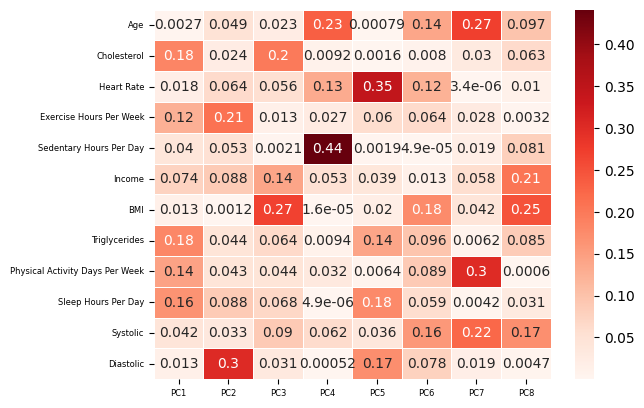

In [15]:
load_sqr = loadings**2
ax = sns.heatmap(load_sqr.transpose(), linewidth = 0.5, cmap = 'Reds', annot = True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 0, fontsize = 6)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation = 0, fontsize = 6)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


[Text(0, 0.5, 'Age'),
 Text(0, 1.5, 'Cholesterol'),
 Text(0, 2.5, 'Heart Rate'),
 Text(0, 3.5, 'Exercise Hours Per Week'),
 Text(0, 4.5, 'Sedentary Hours Per Day'),
 Text(0, 5.5, 'Income'),
 Text(0, 6.5, 'BMI'),
 Text(0, 7.5, 'Triglycerides'),
 Text(0, 8.5, 'Physical Activity Days Per Week'),
 Text(0, 9.5, 'Sleep Hours Per Day'),
 Text(0, 10.5, 'Systolic'),
 Text(0, 11.5, 'Diastolic')]

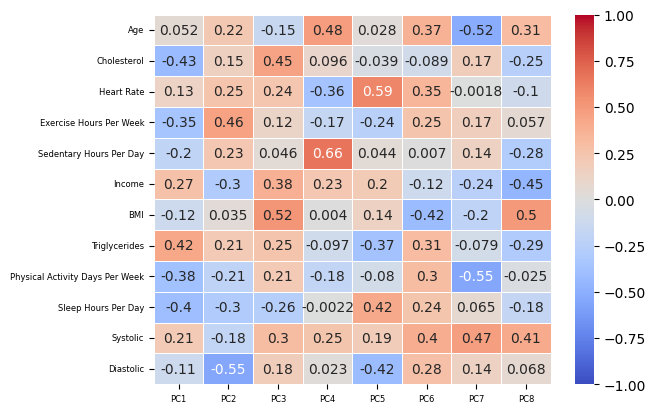

In [16]:
load_sqr = loadings**2
ax = sns.heatmap(loadings.transpose(), center = 0, linewidth = 0.5, cmap = 'coolwarm', 
                 vmin = -1, vmax = 1, annot = True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 0, fontsize = 6)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation = 0, fontsize = 6)